In [42]:
import pandas as pd 
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')

In [65]:
thietbi.rename(columns={'Retail Branding': 'Branding','Marketing Name': 'MarketingName'}, inplace=True)

In [69]:
dfketqua = pd.merge (nguoidung_sudung, nguoidung_thietbi[['use_id', 'platform', 'device']], on='use_id')

In [70]:
dfketqua = pd.merge(dfKetqua,thietbi[['Branding', 'Model']], left_on='device', right_on='Model')

In [71]:
dfketqua [dfketqua.device.str.startswith('GT')].head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [47]:
dfKetQua.groupby ('Branding').agg({

'outgoing_mins_per_month':'mean',

'outgoing_sms_per_month':'mean',

'monthly_mb':'mean',

'use_id': 'count'

})

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
Branding,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


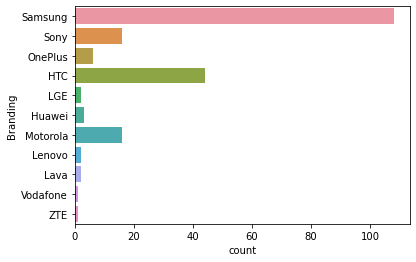

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Branding',data=dfKetQua)
plt.show()

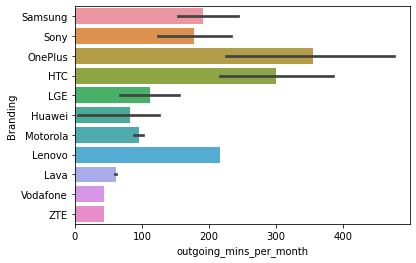

In [49]:
import numpy as np
sns.barplot(y='Branding',x='outgoing_mins_per_month',data=dfKetQua)
plt.show()

<AxesSubplot:xlabel='outgoing_mins_per_month', ylabel='outgoing_sms_per_month'>

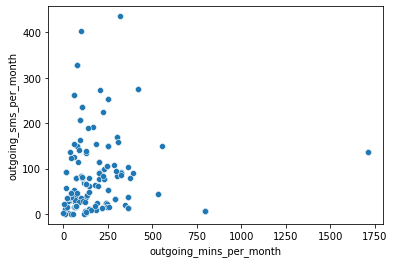

In [50]:
sns.scatterplot(y='outgoing_sms_per_month',x='outgoing_mins_per_month',data=dfKetQua)

In [51]:
# Cau 11
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats
dfKetQua


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505
...,...,...,...,...,...,...,...,...
196,22.85,34.54,6577.12,23029,android,HTC One_M8,HTC,HTC One_M8
197,180.18,17.49,2076.45,23039,android,SM-G531F,Samsung,SM-G531F
198,12.85,58.32,74.40,23040,android,HTC Desire 620,HTC,HTC Desire 620
199,42.75,46.83,5191.12,23053,android,Vodafone Smart ultra 6,Vodafone,Vodafone Smart ultra 6


In [52]:
# Cau 11
ztest(dfKetQua["outgoing_mins_per_month"], value=200)
# Khong du du kien de ket luan trung bình outgoing_mins_per_month bằng 200 phút

(0.3678324474067914, 0.7129981730830808)

In [53]:
# Cau 12
ztest(dfKetQua["outgoing_sms_per_month"], value=100)
# khong du du kien de ket luan trung bình outgoing_sms_per_month khong bằng 100 tin nhắn

(-2.956708578196125, 0.003109418467062032)

In [54]:
# Cau 13
ztest(dfKetQua["monthly_mb"], value=2048)
# khong du du kien de ket luan  trung bình monthly_mb có bằng 2048 mb

(5.918078326415771, 3.257248511198895e-09)

In [55]:
# Cau 14
import pandas as pd

correlation_matrix = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()

correlation_pairs = correlation_matrix.unstack().reset_index()

correlation_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

correlation_pairs = correlation_pairs[correlation_pairs['Feature1'] != correlation_pairs['Feature2']]

correlation_pairs.drop_duplicates(subset=['Correlation'], inplace=True)

correlation_pairs_sorted = correlation_pairs.sort_values(by='Correlation')

print(correlation_pairs_sorted)

                  Feature1                Feature2  Correlation
5   outgoing_sms_per_month              monthly_mb    -0.046049
1  outgoing_mins_per_month  outgoing_sms_per_month    -0.016494
2  outgoing_mins_per_month              monthly_mb     0.213489


In [56]:
# cau 15
import pandas as pd
import scipy.stats as stats

correlation, p_value = stats.pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

dfKetQua = pd.DataFrame({
    'Hệ số tương quan': [correlation],
    'P-value': [p_value]
})

print(dfKetQua)

   Hệ số tương quan   P-value
0         -0.016494  0.816222


In [72]:
# Cau 16
import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(dfketqua['platform'], dfketqua['Branding'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-squared Statistic: 0.0
P-value: 1.0


In [73]:
# Cau 17
import pandas as pd
import scipy.stats as stats

# Tạo bảng phân phối chéo giữa platform và branding
contingency_table = pd.crosstab(dfketqua['monthly_mb'], dfketqua['platform'])

# Thực hiện kiểm định Chi-squared
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Hiển thị kết quả
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-squared Statistic: 0.0
P-value: 1.0


In [75]:
# Cau 18
import pandas as pd
import scipy.stats as stats

# Tạo một DataFrame để chứa kết quả
results = []

# Duyệt qua từng nhóm branding
for branding, group in dfketqua.groupby('Branding'):
    # Thực hiện kiểm định ANOVA giữa monthly_mb và platform trong nhóm branding
    f_stat, p_value = stats.f_oneway(*[group['monthly_mb'][group['platform'] == platform] for platform in group['platform'].unique()])
    
    # Lưu kết quả vào danh sách
    results.append({'Branding': branding, 'F-statistic': f_stat, 'P-value': p_value})

# Chuyển đổi danh sách kết quả thành DataFrame
df_results = pd.DataFrame(results)

# Hiển thị kết quả
print(df_results)

TypeError: at least two inputs are required; got 1.